In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
#import data
enquiries = pd.read_csv('C:\\Users\\ueber\\OneDrive\\Desktop\Work - Armour Valve\\Random Tasks\\CSV_File_Armour.csv', sep=",", encoding="utf-8")
#Create data frame
df_chemenquiries = pd.DataFrame(enquiries)

In [3]:
enquiries

,Year,Country,Primary Market,Sector,Sub Sector,Quote Type,Commission,Win/Loss,Order Value
0,2018,CA,Chemical & Petrochemical,Petrochemical,NaN,Buy,No,Loss,1730
1,2018,CA,Chemical & Petrochemical,Petrochemical,NaN,Buy,No,Abandoned,0
2,2018,CA,Chemical & Petrochemical,Petrochemical,Ethanol,Buy,No,Abandoned,239
3,2018,CA,Chemical & Petrochemical,Petrochemical,Hydrocarbon,Buy,Yes,Abandoned,15965
4,2018,CA,Chemical & Petrochemical,Petrochemical,Hydrocarbon,Buy,No,Loss,1189
...,...,...,...,...,...,...,...,...,...
3226,2020,CA,Water & Waste Water,Water and Wastewater,Water Works,Buy,No,NaN,11584
3227,2020,CA,Water & Waste Water,Water and Wastewater,Water Works,Buy,No,NaN,8621
3228,2020,CA,Water & Waste Water,Water and Wastewater,Water Works,Buy,No,Abandoned,0
3229,2020,CA,Water & Waste Water,Water and Wastewater,Water Works,Buy,No,Win,1216


In [4]:
#Clean fill order value where it's blank with a value of 0
df_chemenquiries['Order Value'] = df_chemenquiries['Order Value'].fillna(0)
#convert order values into int
order_values =df_chemenquiries ['Order Value'].values
for value in range(len(order_values)):
    order_values[value] = int(str(order_values[value]).replace(",",""))

In [5]:
#Get unique values of required information
primarymarkets = df_chemenquiries["Primary Market"].unique()
sectors = df_chemenquiries["Sector"].unique()
subsectors = df_chemenquiries["Sub Sector"].unique()
uniqueyear = df_chemenquiries["Year"].unique()

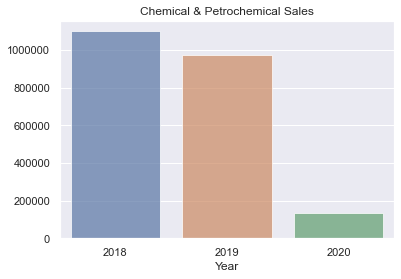

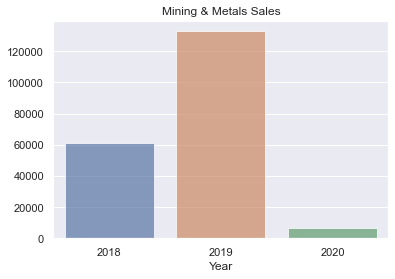

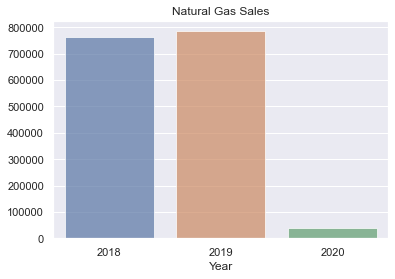

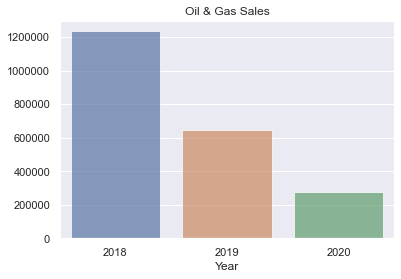

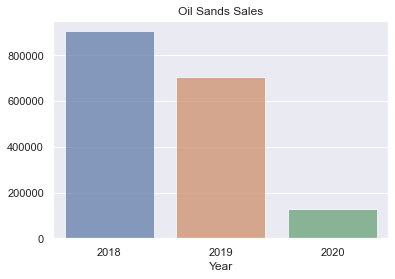

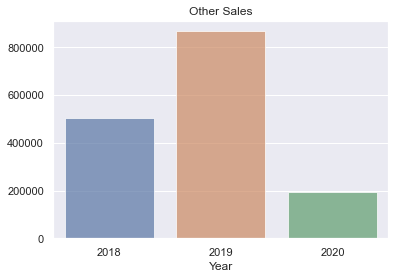

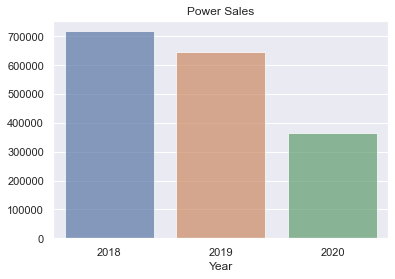

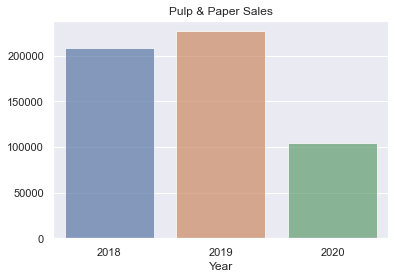

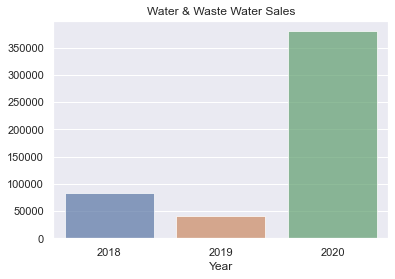

In [10]:
#empty dictionary is filled with the value for market with each loop. This fills the dictionary with a key for market and the year values
dict = {}
for market in primarymarkets:
#change year variables to dynamics
#Create variables for the chart
    dict[market] = []
    for year in uniqueyear:
        values = df_chemenquiries["Order Value"][(df_chemenquiries["Primary Market"]==market) & (df_chemenquiries["Year"]== year) & (df_chemenquiries["Win/Loss"]=="Win")].sum()
        dict[market].append(values)
    
    #sns histogram
    #x = uniqueyear np.arange(len(uniqueyear)
    #y= year
    x_pos = np.arange(len(uniqueyear))
    marketsales = dict[market]
    y_pos = uniqueyear
    #y_pos = x , marketsales = y_values, transparency
    sns.barplot(x = y_pos, y = marketsales, alpha = 0.7, data = df_chemenquiries) # bar plots for the sequence
    plt.ticklabel_format(style='plain', axis='y',useOffset=False) # axis display correct values
    sns.set()
    plt.xlabel('Year')
    plt.title(market + " Sales")
        
    #plt.savefig(r'C:\Users\srobitaille\Documents\Strategy Session\2021\Charts\Primary Market Sales\{}_sales.png'.format(market))
    plt.show()